In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#read the dataset 
da = pd.read_csv ("/content/polveri_emilia_PM10.txt")
#da = pd.read_excel("Polveri Emilia.xlsx")
da.head()

,02000003_005_202007.csv,COD_STAZ,ID_PARAM,DATA_INIZIO,DATA_FINE,VALORE,UM,Anno,Mese,Giorno,...,Mesenome,Stazione,COMUNE,INDIRIZZO,PROVINCIA,Altezza,PARAMETRO,TipoStazione,TipoArea,Zonizzazione
0,02000003_005_202007.txt,2000003,5,43831,43832,52,ug/m3,2020,1,1,...,gennaio,CITTADELLA,PARMA,PARCO CITTADELLA,PR,60.0,PM10,Fondo,Urbano,Pianura Ovest
1,02000003_005_202007.txt,2000003,5,43832,43833,59,ug/m3,2020,1,2,...,gennaio,CITTADELLA,PARMA,PARCO CITTADELLA,PR,60.0,PM10,Fondo,Urbano,Pianura Ovest
2,02000003_005_202007.txt,2000003,5,43833,43834,45,ug/m3,2020,1,3,...,gennaio,CITTADELLA,PARMA,PARCO CITTADELLA,PR,60.0,PM10,Fondo,Urbano,Pianura Ovest
3,02000003_005_202007.txt,2000003,5,43834,43835,42,ug/m3,2020,1,4,...,gennaio,CITTADELLA,PARMA,PARCO CITTADELLA,PR,60.0,PM10,Fondo,Urbano,Pianura Ovest
4,02000003_005_202007.txt,2000003,5,43835,43836,31,ug/m3,2020,1,5,...,gennaio,CITTADELLA,PARMA,PARCO CITTADELLA,PR,60.0,PM10,Fondo,Urbano,Pianura Ovest


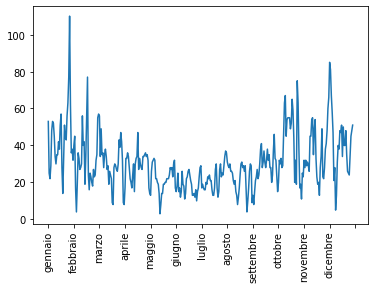

In [ ]:
#import math
d = da[da['Anno'] == 2018]
data = d[d['Stazione'] == "CITTADELLA"]

VAL = data['VALORE']
giorni = data['DATA_INIZIO']
mesi = ['gennaio','febbraio','marzo','aprile','maggio','giugno','luglio','agosto','settembre','ottobre','novembre','dicembre']

fig, ax = plt.subplots()

plt.xticks(np.arange(0, 365, 30),mesi)
plt.plot(giorni,VAL)
plt.xticks(rotation=90) 

plt.show()

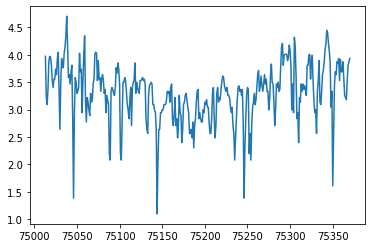

In [ ]:
#LOG TRANSFORMATION
log_data = np.log(VAL)
plt.plot(log_data)

In [ ]:
# splitting the data into three parts
part_1, part_2, part_3, part_4 = VAL[0:s], VAL[s:(
    s*2)], VAL[(s*2):(s*3)], VAL[(s*3):(s*4)] 
 
# calculating the mean of the separated three
# parts of data individually.
mean_1, mean_2, mean_3, mean_4 = part_1.mean(), part_2.mean(), part_3.mean(), part_4.mean()
 
# calculating the variance of the separated
# three parts of data individually.
var_1, var_2, var_3, var_4 = part_1.var(), part_2.var(), part_3.var(), part_4.var()
 
# printing the mean of three groups
print('mean1=%f, mean2=%f, mean3=%f, mean4=%f' % (mean_1, mean_2, mean_3, mean_4))
 
# printing the variance of three groups
print('variance1=%f, variance2=%f, variance3=%f, variance4=%f ' % (var_1, var_2, var_3, var_4))


mean1=35.744444, mean2=23.133333, mean3=23.988889, mean4=39.431818
variance1=276.259800, variance2=66.026966, variance3=68.887516, variance4=271.466562 


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


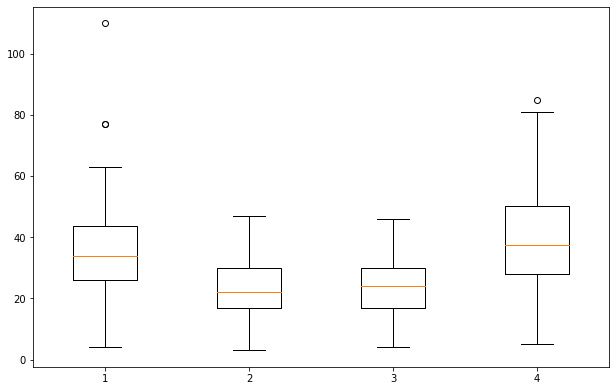

In [117]:
import matplotlib.pyplot as plt
log_1, log_2, log_3, log_4 = log_data[0:s], log_data[s:(
    s*2)], log_data[(s*2):(s*3)], log_data[(s*3):(s*4)]

post_log = [log_1, log_2, log_3, log_4 ]
pre_log = [part_1, part_2, part_3, part_4]
 
fig = plt.figure(figsize =(8, 5))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(pre_log)
#bp = ax.boxplot(post_log)
 
# show plot
plt.show()

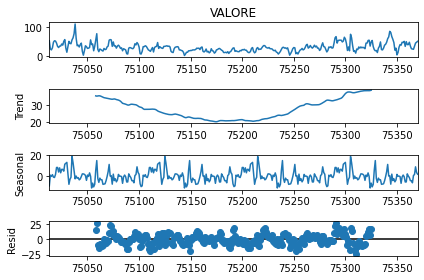

In [118]:
from statsmodels.tsa.seasonal import seasonal_decompose
sd = seasonal_decompose(VAL,period = 90).plot()

### test


In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def adfuller_test(timeserie):
    result=adfuller(timeserie)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

#if P-VALUE <= 0.05:
 #   print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
#else:
 #   print("weak evidence against null hypothesis,indicating it is non-stationary ")

adfuller_test(VAL)

#pvalue < 0.05 ----> stationary

ADF Test Statistic : -4.1012714950243305
p-value : 0.0009638480990479235
#Lags Used : 8
Number of Observations : 349


### ARIMA MODEL
$$\
\textbf{ARIMA(p,d,q):} \\
Y_t = (1-B)^d X_t $$ is a casual ARMA(p,q) process 


In [ ]:
s = 90
data['First Difference'] = log_data - log_data.shift(122)
data['Seasonal First Difference']=log_data-log_data.shift(12)
data.head()

### SARIMA MODEL
$$\
\textbf{SARIMA(p,d,q)x(P,D,Q)$_s$:} \\
Y_t = (1-B)^d(1-B^s)^D X_t $$ is a casual ARMA(p,q) process.  
In applications D is rarely more than one, and P and Q are typically less
than three.


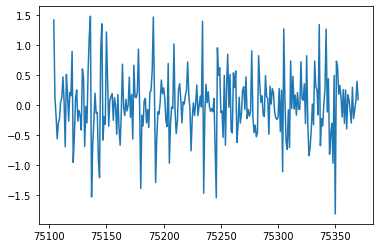

In [ ]:
#d = 1 
#s = period 90 (=3 mesi)

SARIMA = ( log_data- log_data.shift(s) - log_data.shift(1) + log_data.shift(s+1)  )
SARIMA.plot()

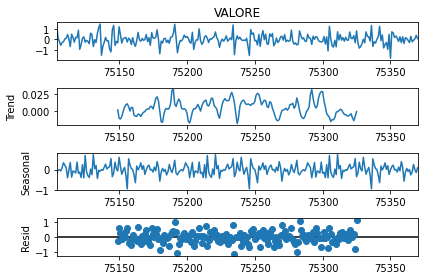

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
sd = seasonal_decompose(SARIMA.dropna(),period = 90).plot()

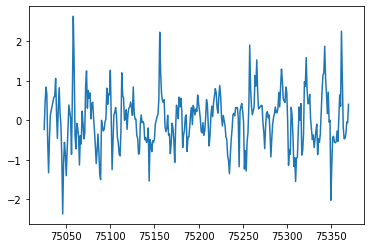

In [ ]:
#data['First Difference'].plot()
data['Seasonal First Difference'].plot()

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(log_data)
plt.show()
#periodica ---> seasonality in time series

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import acovf
import statsmodels.api as sm

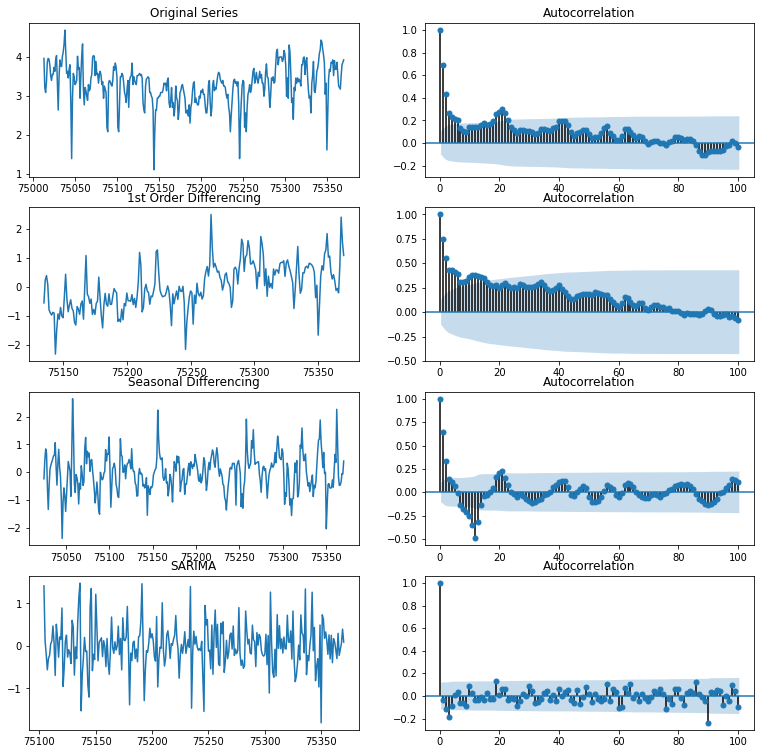

In [ ]:
# Original Series
fig, axes = plt.subplots(4, 2,figsize=(13,13))
axes[0, 0].plot(log_data) 
axes[0, 0].set_title('Original Series')
plot_acf(log_data, ax=axes[0, 1],lags=100)

# 1st Differencing
axes[1, 0].plot(data['First Difference']); axes[1, 0].set_title('1st Order Differencing')
plot_acf(data['First Difference'].dropna(),lags=100, ax=axes[1, 1])

# Seasonal Differencing
axes[2, 0].plot(data['Seasonal First Difference']); axes[2, 0].set_title('Seasonal Differencing')
plot_acf(data['Seasonal First Difference'].dropna(),lags=100, ax=axes[2, 1])

# Seasonal Differencing
axes[3, 0].plot(SARIMA); axes[3, 0].set_title('SARIMA')
plot_acf(SARIMA.dropna(),lags=100, ax=axes[3, 1])


plt.show()


### AUTOCORRELATION p AR(p)
PAC = Partial autocorrelation can be imagined as the correlation between the series and own lagged values. That way, you will know if that lag is needed in the AR term or not.
$$\
X_t = \alpha_0 + \alpha_1X_{t-1} + \alpha_2X_{t-2} + \alpha_3X_{t-3} 
$$

That is, suppose, if $X_t$ is the current series and $X_{t-1}$ is the lag 1 of $X$, then the partial autocorrelation of lag 3 $(Y_{t-3})$ is the coefficient $\alpha_3$ of $Y_{t-3}$ in the above equation.


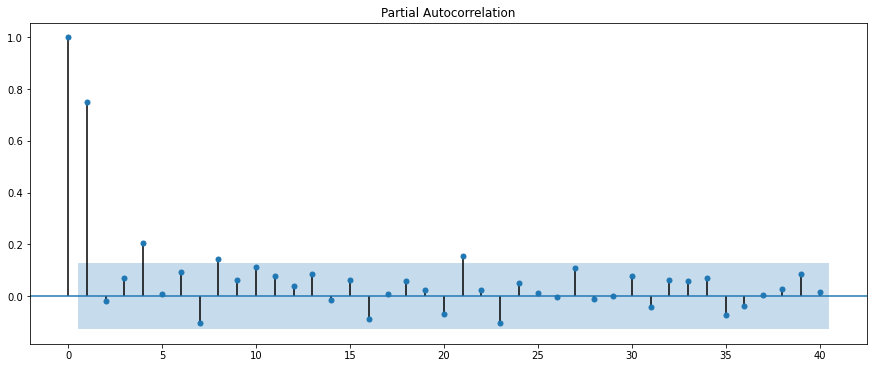

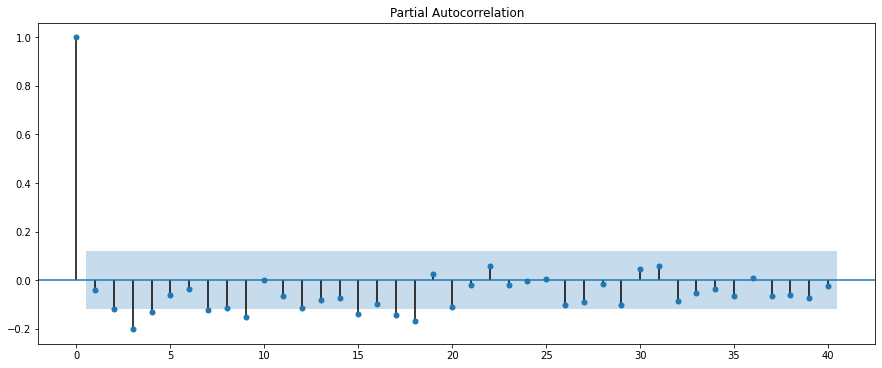

In [120]:
#APPLICARE alla serie stazionaria  data['First Difference']


fig = plt.figure(figsize=(15,13))
ax2 = fig.add_subplot(212)
fig = plot_pacf(data['First Difference'].dropna(),lags=40, ax=ax2)

fig = plt.figure(figsize=(15,13))
ax2 = fig.add_subplot(212)
fig = plot_pacf(SARIMA.dropna(),lags=40, ax=ax2)


### MOVING AVERAGE q MA(q)
$$
ACF: \rho_x(h) = Cor(X_{t+h},X_t)
$$ 
The ACF tells how many MA terms are required to remove any autocorrelation in the stationarized series.


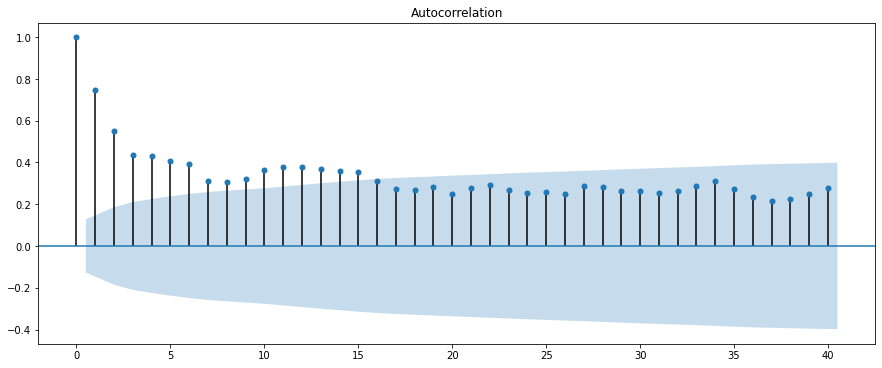

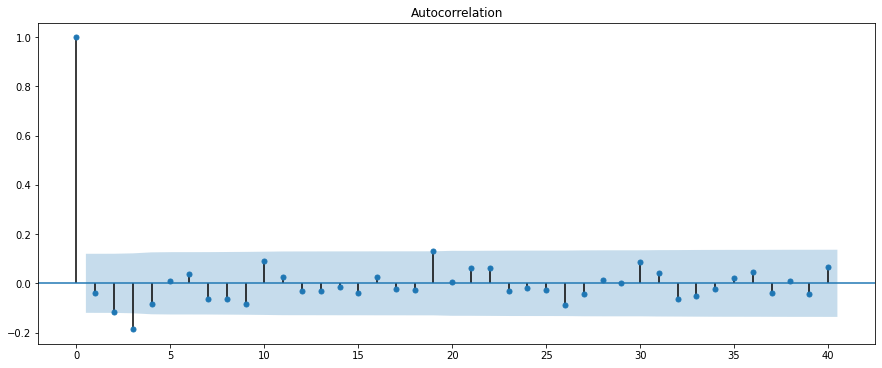

In [121]:
fig = plt.figure(figsize=(15,13))
ax2 = fig.add_subplot(212)
fig = plot_acf(data['First Difference'].dropna(),lags=40, ax=ax2)

plt.show()

fig = plt.figure(figsize=(15,13))
ax2 = fig.add_subplot(212)
fig = plot_acf(SARIMA.dropna(),lags=40, ax=ax2)

plt.show()